# Daily Climate

[Deskripsi]

EXP : At this notebook, we will analyze the Nvidia stock data. We will use the data from kaggle dataset [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data) to analyze the stock data. We will use the data all data from 2018 - 2024 to analyze the stock data.

# Download and Import Dataset

We will download the dataset from kaggle and import the dataset to the notebook using kagglehub.

In [1]:
import kagglehub
import os
import shutil

path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data", force_download=True)

final_path = os.path.join(os.getcwd(), "data")
os.makedirs(final_path, exist_ok=True)
print(f"Data downloaded to {path}")

if path != final_path:
    print("Moving data to final path")
    for file_name in os.listdir(path):
        print(f"Moving {file_name} to {final_path}")
        source = os.path.join(path, file_name)
        destination = os.path.join(final_path, file_name)
        shutil.move(source, destination)

print(f"Data moved to {final_path}")


100%|██████████| 22.0k/22.0k [00:00<00:00, 11.3MB/s]

Extracting files...
Data downloaded to C:\Users\thari\.cache\kagglehub\datasets\sumanthvrao\daily-climate-time-series-data\versions\3
Moving data to final path
Moving DailyDelhiClimateTest.csv to e:\Cool Yeah\data-science\Dailty Climate\data
Moving DailyDelhiClimateTrain.csv to e:\Cool Yeah\data-science\Dailty Climate\data
Data moved to e:\Cool Yeah\data-science\Dailty Climate\data


In [2]:
import pandas as pd


test = pd.read_csv("data/DailyDelhiClimateTest.csv")
train = pd.read_csv("data/DailyDelhiClimateTrain.csv")

In [3]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


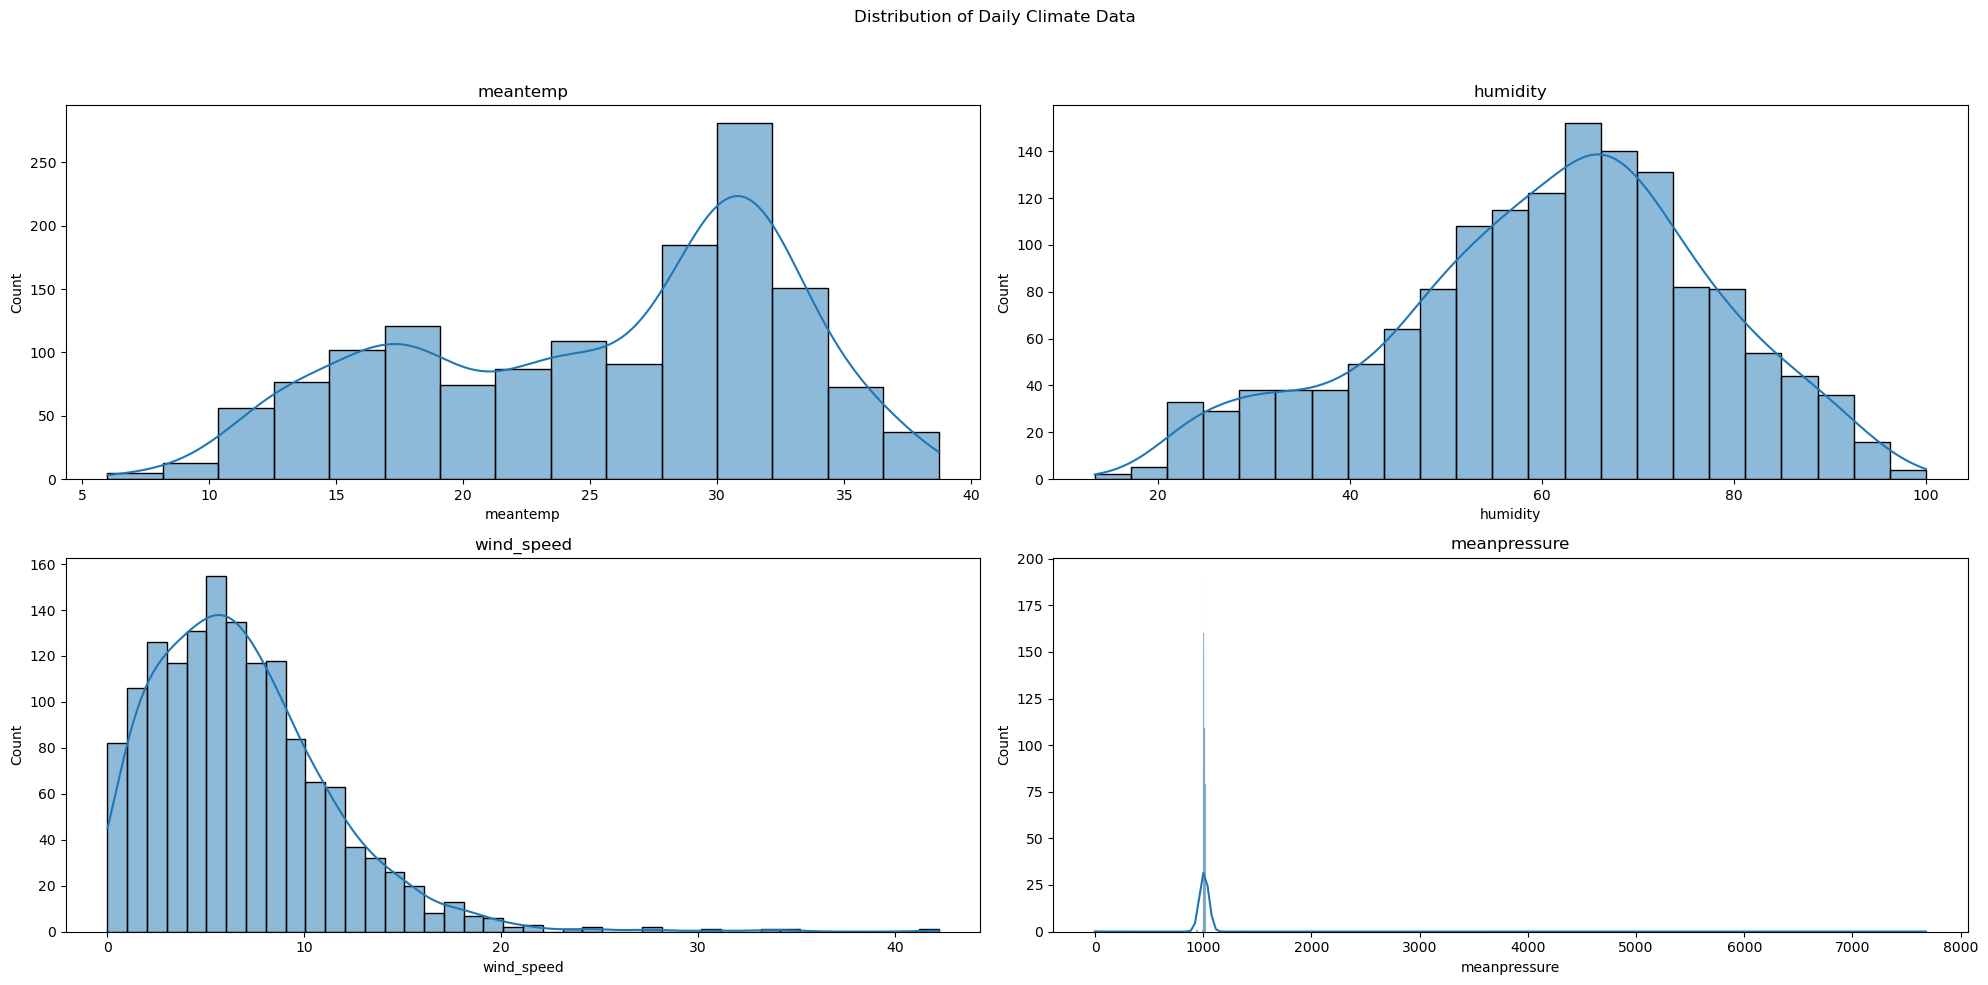

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Distribution of Train Daily Climate Data')

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for ax, col in zip(axes.flat, columns):
    sns.histplot(train[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


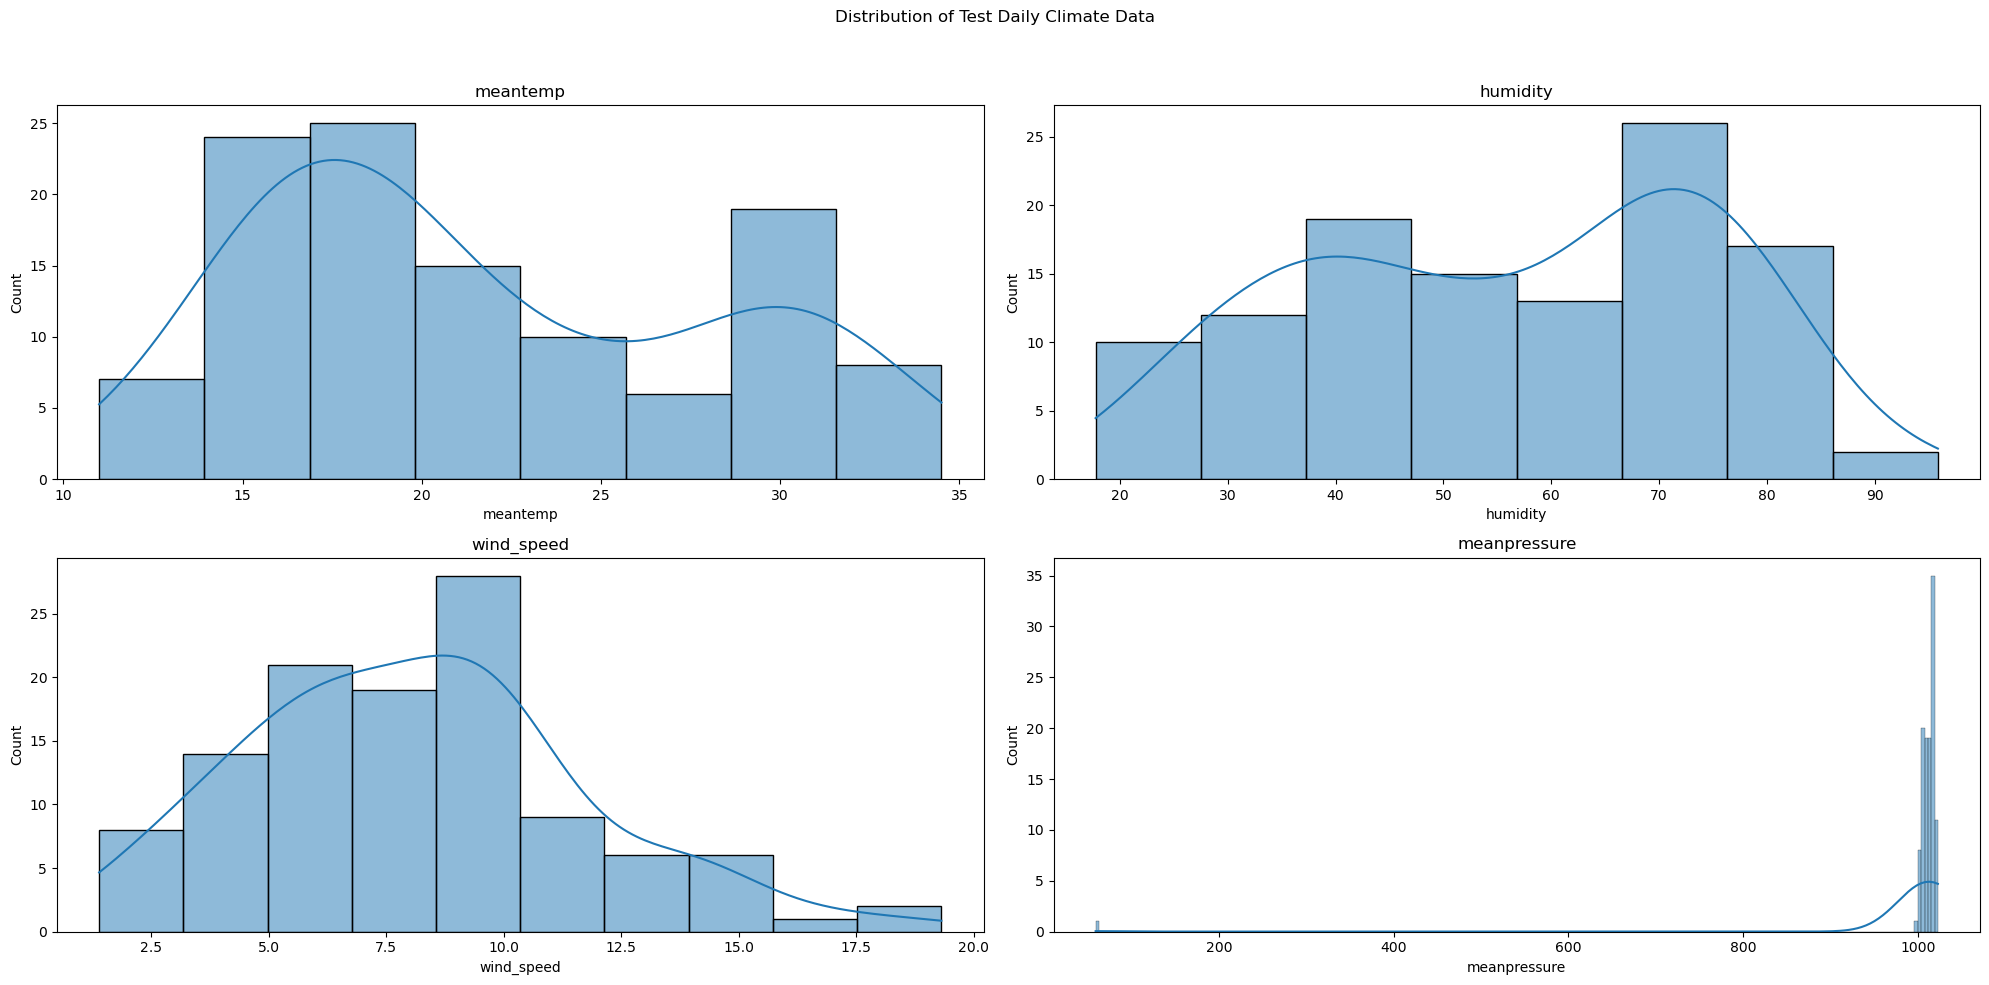

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Distribution of Test Daily Climate Data')

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for ax, col in zip(axes.flat, columns):
    sns.histplot(test[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


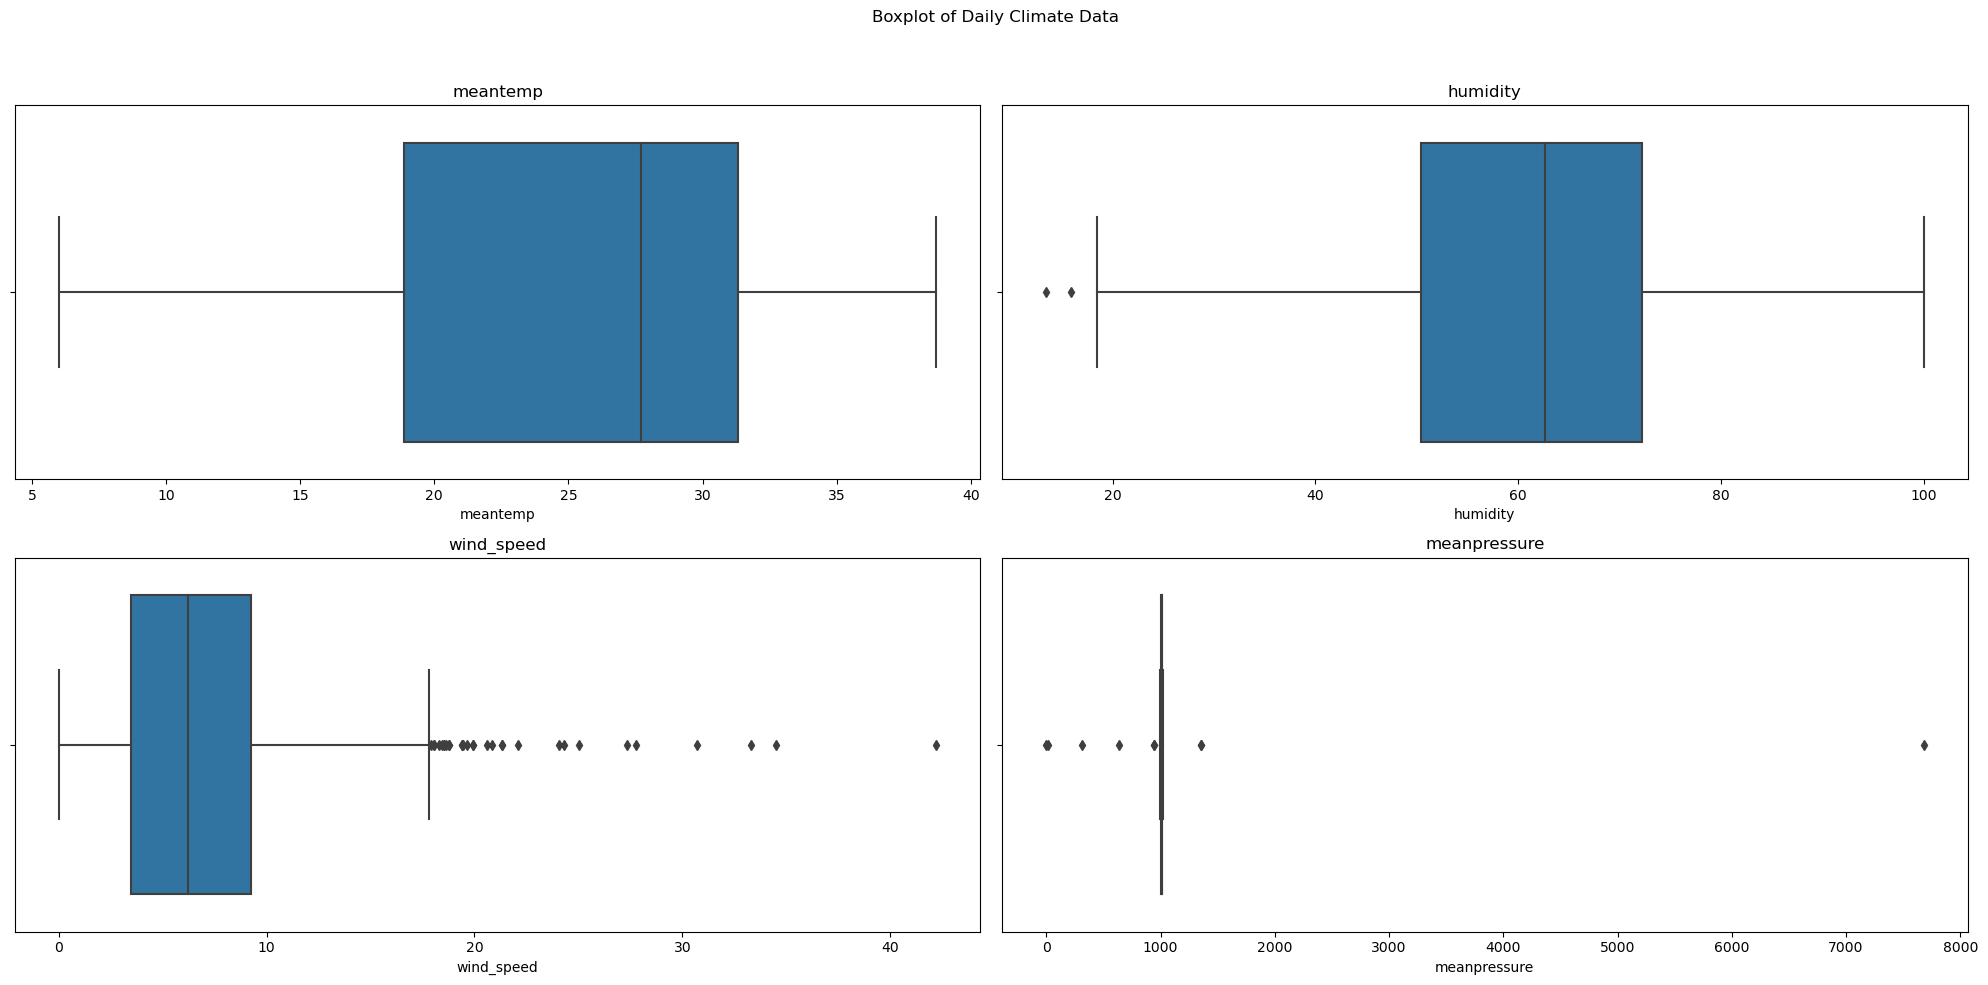

In [ ]:
# boxplot
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Boxplot of Train Daily Climate Data')

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=train[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

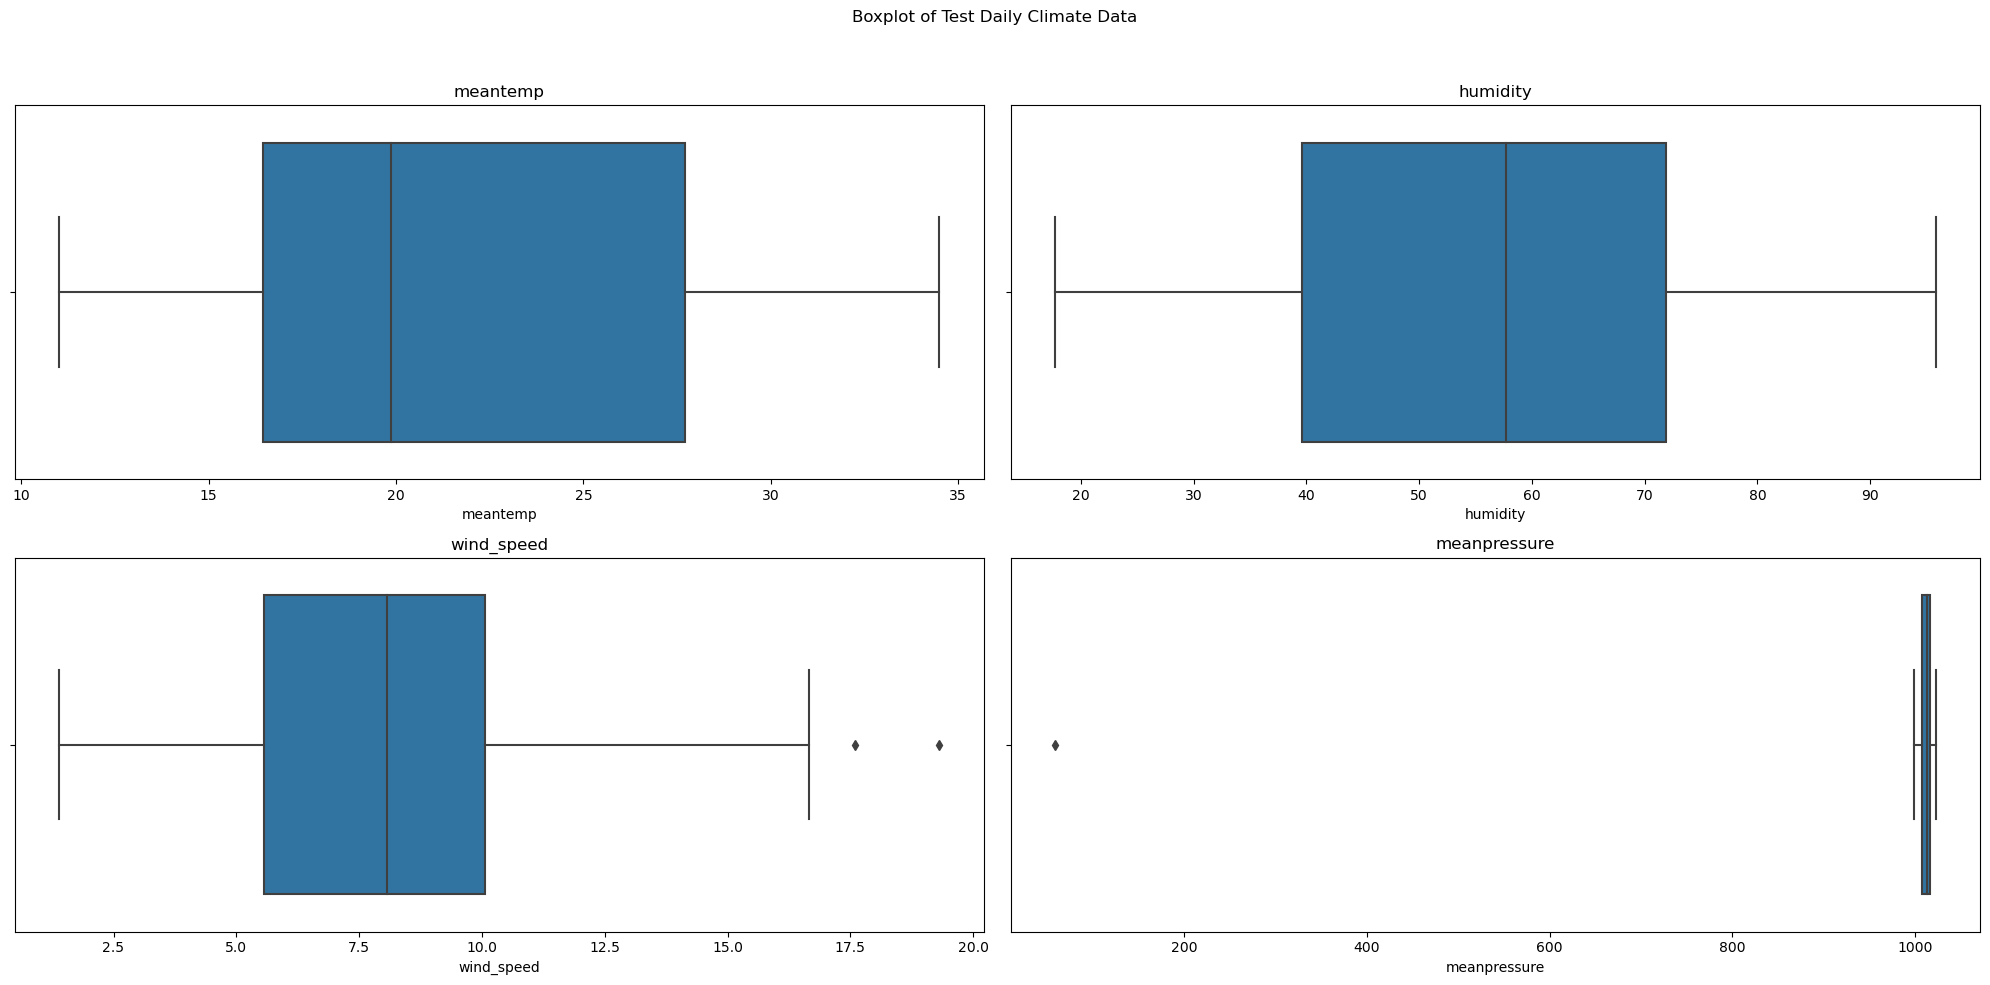

In [103]:
# boxplot
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Boxplot of Test Daily Climate Data')

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=test[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [108]:
import plotly.express as px

fig = px.line(train, x='date', y='meanpressure', title='Mean Pressure over Time')
fig.show()

In [113]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

normalised_train = train.copy()
normalised_test = test.copy()

scaler_meanpressure = MinMaxScaler()
normalised_train['meanpressure'] = scaler_meanpressure.fit_transform(normalised_train[['meanpressure']])
normalised_test['meanpressure'] = scaler_meanpressure.transform(normalised_test[['meanpressure']])

scaler_humidity = MinMaxScaler()
normalised_train['humidity'] = scaler_humidity.fit_transform(normalised_train[['humidity']])
normalised_test['humidity'] = scaler_humidity.transform(normalised_test[['humidity']])

scaler_wind_speed = MinMaxScaler()
normalised_train['wind_speed'] = scaler_wind_speed.fit_transform(normalised_train[['wind_speed']])
normalised_test['wind_speed'] = scaler_wind_speed.transform(normalised_test[['wind_speed']])

scaler_meantemp = MinMaxScaler()
normalised_train['meantemp'] = scaler_meantemp.fit_transform(normalised_train[['meantemp']])
normalised_test['meantemp'] = scaler_meantemp.transform(normalised_test[['meantemp']])

fig = px.line(normalised_train, x='date', y=['meantemp', 'humidity', 'wind_speed'], title='Climate Data over Time')
fig.show()

In [114]:
import plotly.express as px

fig = px.line(normalised_test, x='date', y=['meantemp', 'humidity', 'wind_speed'], title='Climate Data over Time')
fig.show()

In [10]:
# split date into year, month, day
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

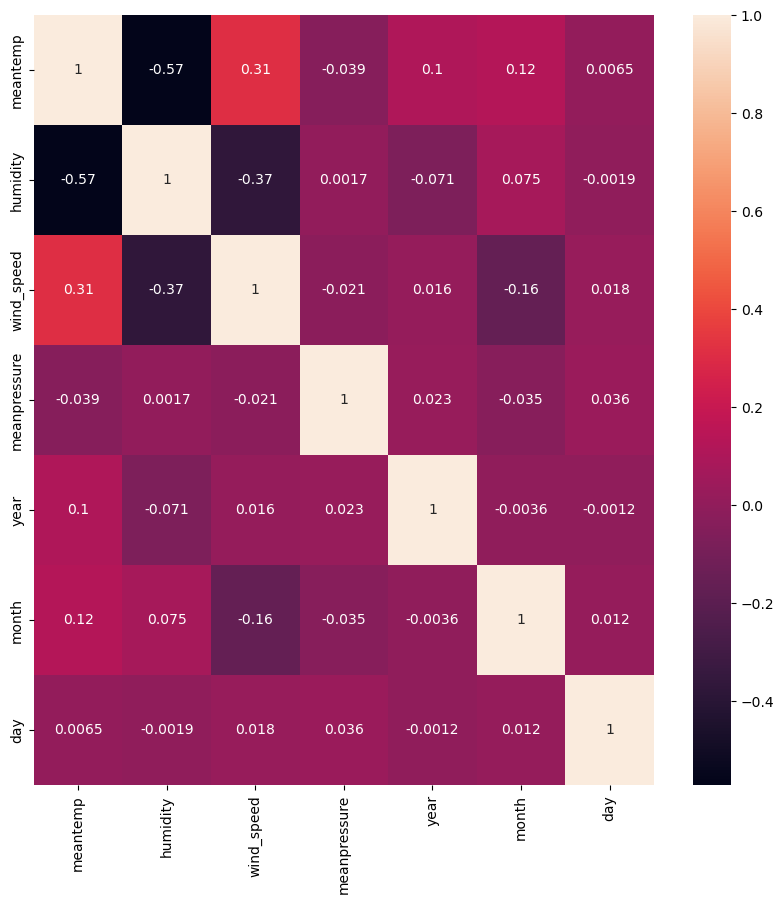

In [11]:
# heatmap correlation
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, ax=ax)
plt.show()

# Modeling

In [48]:
tr = train[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day']]

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train.index = train['date']
test.index = test['date']
tr_data = train[['meantemp', 'humidity', 'wind_speed']]
te_data = test[['meantemp', 'humidity', 'wind_speed']]
tr_data = scaler.fit_transform(tr_data)
te_data = scaler.transform(te_data)

In [93]:
import numpy as np

def create_dataset(data, lookBack):
    X, Y = [], []
    for i in range(len(data) - lookBack):
        X.append(data[i:(i + lookBack), 1:])
        Y.append(data[i + lookBack, 0])
    return np.array(X), np.array(Y)

look_back = 3
X_train, Y_train = create_dataset(tr_data, lookBack=look_back)
X_test, Y_test = create_dataset(te_data, lookBack=look_back)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1459, 3, 2) (1459,) (111, 3, 2) (111,)


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 3, 100)            41200     
                                                                 
 dropout_25 (Dropout)        (None, 3, 100)            0         
                                                                 
 lstm_26 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121701 (475.39 KB)
Trainable params: 121701 (475.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
46/46 [==============================] - 2s 5ms/step - loss: 0.1281
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0377
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0368
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0360
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0361
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0353
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0356
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0352
Epoch 11/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0348
Epoch 12/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0360
Epoch 13/100
46/46 [=================

In [96]:
predicted = model.predict(X_test)
predicted = np.hstack((predicted, np.zeros((predicted.shape[0], 2))))
predicted = scaler.inverse_transform(predicted)
predicted = predicted[:, 0]

predicted

4/4 [==============================] - 1s 3ms/step


array([18.4571518 , 20.74161184, 20.65371222, 21.79971046, 20.20399066,
       21.36635071, 20.50692296, 20.92505965, 23.3307357 , 24.05886244,
       24.75075765, 22.86577257, 23.01728942, 22.21801777, 21.7248685 ,
       22.94292714, 22.67466448, 24.25649302, 25.0586564 , 24.6056736 ,
       24.40369664, 22.7745649 , 23.37444908, 21.27801821, 24.48561097,
       21.57405558, 23.78670383, 22.44668724, 22.40055985, 20.8112709 ,
       22.11143691, 20.47955774, 21.35143283, 21.31338007, 24.35328722,
       24.67984089, 24.48672828, 24.81041946, 23.7290563 , 24.96038416,
       23.25607313, 22.93157079, 22.94464307, 24.38204859, 26.47586266,
       25.47264464, 25.96489109, 25.39649233, 25.03147447, 25.19250694,
       27.18282299, 29.15681232, 30.2782854 , 30.18015746, 29.70545641,
       28.17878925, 27.72271582, 27.33871741, 27.13672875, 29.67516045,
       29.30972726, 31.1130476 , 31.03877112, 31.0531674 , 29.77055655,
       27.20065308, 27.32518884, 25.84432148, 26.9051812 , 27.79

In [97]:
Y_test = Y_test.reshape(-1, 1)
Y_test = np.hstack((Y_test, np.zeros((Y_test.shape[0], 2))))
Y_test = scaler.inverse_transform(Y_test)
Y_test = Y_test[:, 0]

Y_test

array([18.7       , 18.38888889, 19.31818182, 14.70833333, 15.68421053,
       14.57142857, 12.11111111, 11.        , 11.78947368, 13.23529412,
       13.2       , 16.43478261, 14.65      , 11.72222222, 13.04166667,
       14.61904762, 15.26315789, 15.39130435, 18.44      , 18.11764706,
       18.34782609, 21.        , 16.17857143, 16.5       , 14.86363636,
       15.66666667, 16.44444444, 16.125     , 15.25      , 17.09090909,
       15.63636364, 18.7       , 18.63157895, 16.88888889, 15.125     ,
       15.7       , 15.375     , 14.66666667, 15.625     , 16.25      ,
       16.33333333, 16.875     , 17.57142857, 20.25      , 21.3       ,
       21.125     , 22.36363636, 23.375     , 21.83333333, 19.125     ,
       18.625     , 19.125     , 19.        , 18.75      , 19.875     ,
       23.33333333, 24.46153846, 23.75      , 20.5       , 19.125     ,
       19.75      , 20.        , 22.625     , 21.54545455, 20.78571429,
       19.9375    , 18.53333333, 17.375     , 17.44444444, 18.  

In [98]:
print(test.index.shape, predicted.shape, Y_test.shape)

(114,) (111,) (111,)


In [99]:
import plotly.express as px

data = pd.DataFrame(
    {
        'date': test['date'].iloc[look_back:],
        'actual': Y_test,
        'predicted': predicted
    }
)

fig = px.line(data, x='date', y=['actual', 'predicted'], title='Actual vs Predicted Mean Temperature')
fig.show()
